# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | cutral-co
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | al hasakah
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | bacchus marsh
Processing Record 10 of Set 1 | bikenibeu village
Processing Record 11 of Set 1 | leticia
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | khenchela
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | kourou
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | tazovsky
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | palmares do sul
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,16.20,93,100,8.23,CA,1691426269
1,whitehorse,60.7161,-135.0538,17.43,67,75,4.12,CA,1691426475
2,papatowai,-46.5619,169.4708,4.83,89,100,5.26,NZ,1691426475
3,cutral-co,-38.9469,-69.2089,9.95,10,75,4.92,AR,1691426236
4,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1691426475


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,16.20,93,100,8.23,CA,1691426269
1,whitehorse,60.7161,-135.0538,17.43,67,75,4.12,CA,1691426475
2,papatowai,-46.5619,169.4708,4.83,89,100,5.26,NZ,1691426475
3,cutral-co,-38.9469,-69.2089,9.95,10,75,4.92,AR,1691426236
4,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1691426475


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

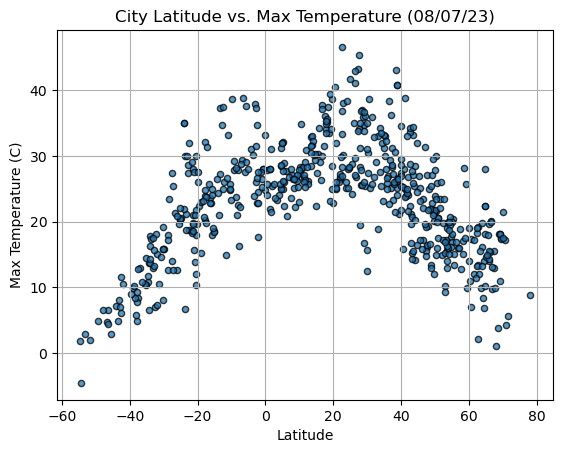

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,
                    title=(f"City Latitude vs. Max Temperature ({time.strftime('%x')})"), 
                    xlabel="Latitude", 
                    ylabel="Max Temperature (C)",
                    edgecolors="black",
                    alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

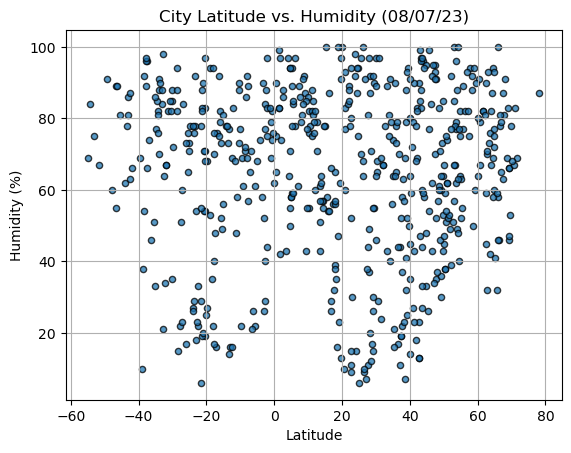

In [9]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,
                    title=(f"City Latitude vs. Humidity ({time.strftime('%x')})"), 
                    xlabel="Latitude", 
                    ylabel="Humidity (%)",
                    edgecolors="black", 
                    alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

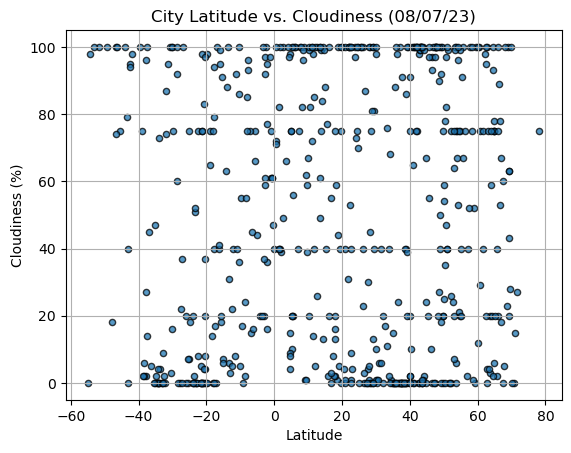

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,
                    title=(f"City Latitude vs. Cloudiness ({time.strftime('%x')})"), 
                    xlabel="Latitude", 
                    ylabel="Cloudiness (%)",
                    edgecolors="black",
                    alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

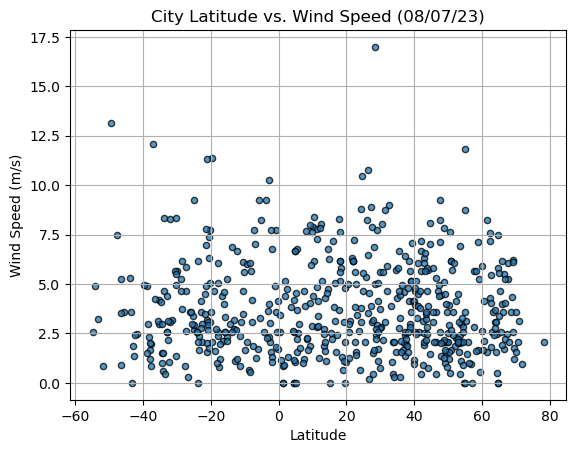

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,
                    title=(f"City Latitude vs. Wind Speed ({time.strftime('%x')})"), 
                    xlabel="Latitude", 
                    ylabel="Wind Speed (m/s)",
                    edgecolors="black",
                    alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def regression(x_values, y_values):
    regress_values = x_values*linregress(x_values, y_values)[0] + linregress(x_values, y_values)[1]

    line_eq = "y = " + str(round(linregress(x_values, y_values)[0],2)) + "x + " + str(round(linregress(x_values, y_values)[1],2))
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)

    print(f"The r-value is: {linregress(x_values, y_values)[2]}")

    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,16.20,93,100,8.23,CA,1691426269
1,whitehorse,60.7161,-135.0538,17.43,67,75,4.12,CA,1691426475
5,al hasakah,36.5024,40.7477,38.30,17,0,4.97,SY,1691426476
7,tiksi,71.6872,128.8694,5.62,69,27,0.98,RU,1691426476
9,bikenibeu village,1.3673,173.1241,27.98,83,40,0.00,KI,1691426251


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papatowai,-46.5619,169.4708,4.83,89,100,5.26,NZ,1691426475
3,cutral-co,-38.9469,-69.2089,9.95,10,75,4.92,AR,1691426236
4,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1691426475
6,port-aux-francais,-49.3500,70.2167,4.92,91,100,13.15,TF,1691426476
8,bacchus marsh,-37.6727,144.4383,8.34,96,14,0.84,AU,1691426476


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6244426560536952


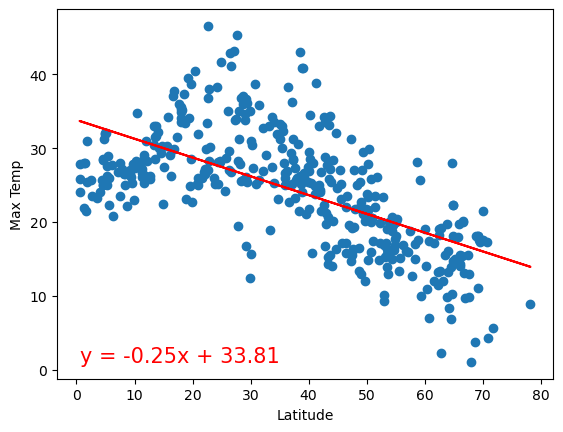

In [15]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is: 0.8077786651354599


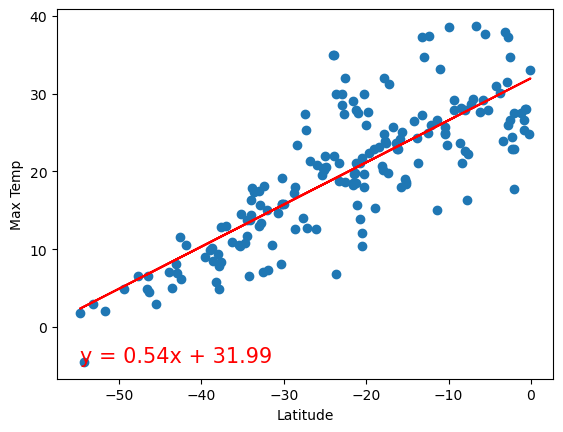

In [16]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** 

There is a moderate to strong correlation between latitude and maximum temperature, with the correlation being stronger in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0034661289191055098


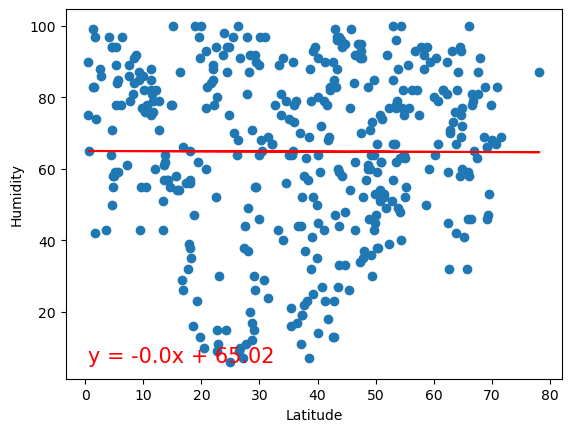

In [17]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is: -0.12363940267178956


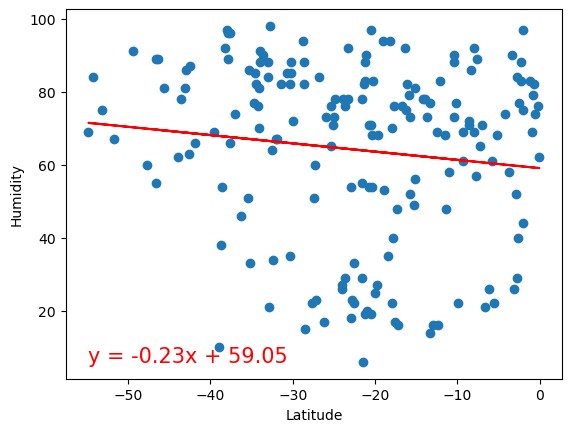

In [18]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** 

There is a very weak to no correlation between latitude and humidity. However, there are more data points with 50% or greater humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03991393044174813


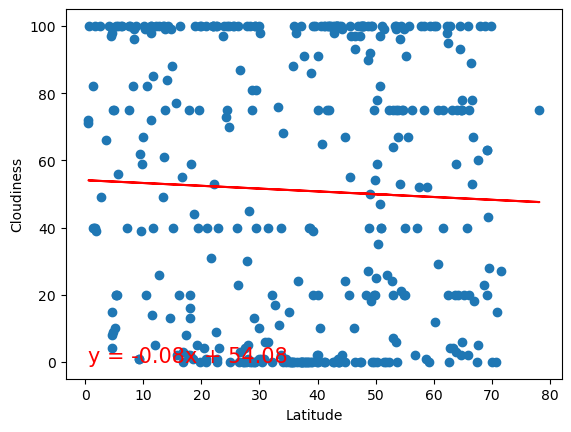

In [19]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is: 0.028887182821401295


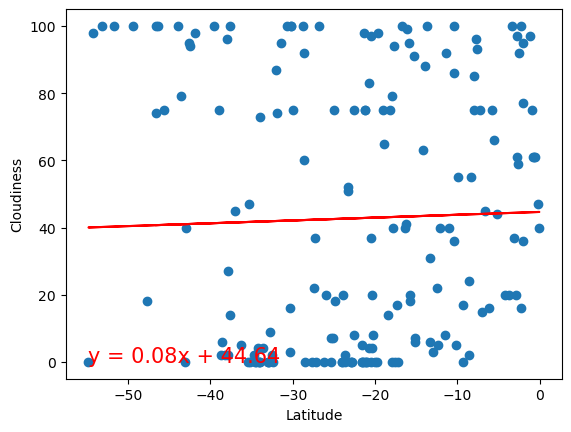

In [20]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** 

There is a very weak correlation between latitude and cloudiness. There are many data points clustered around 0% and 100% cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05674949376904668


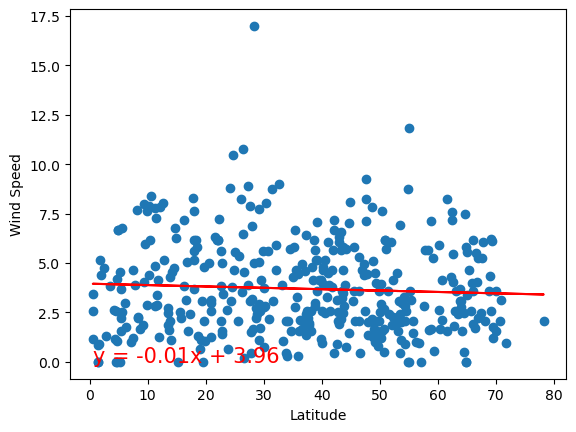

In [21]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is: 0.04797417485448456


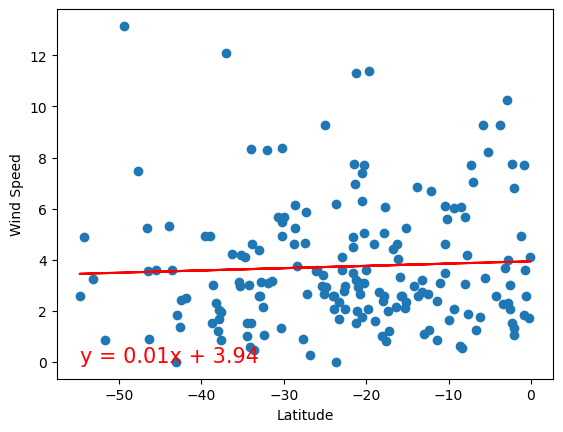

In [22]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** 

There is a very weak to no correlation between latitude and wind speed as most of the data points are below 7.5 m/s. 